In [40]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.append('../data/')
import make_dataset

# Naming Convention

Log_CSV = log_csv_exp[num].log

Model = model_exp[num]_[tf-learning]/simple.h5


# Simple model baseline

model baseline accuracy = 60%

In [42]:
DATA_DIR = "../../data/interim/archive/images/"
BATCH_SIZE = 10
SPLIT_SIZE = 0.3


OUTPUT_FIGURE_DIR = "../../reports/figures"

In [20]:
def train_val_generators(DATA_DIR, SPLIT_SIZE, NUM_BATCHES):
    """

    :param DATA_DIR: Directory of the datasets was taken from (string)
    :param SPLIT_SIZE: Split size of test set. (float)
    :param NUM_BATCHES: Amount of batch size
    :return:
    """
    datagen = ImageDataGenerator(rescale=1. / 255, validation_split=SPLIT_SIZE)
    train_generator = datagen.flow_from_directory(directory=DATA_DIR,
                                                  batch_size=NUM_BATCHES,
                                                  class_mode='categorical',
                                                  target_size=(300, 300),
                                                  subset='training',
                                                    shuffle = True,

    )

    validation_generator = datagen.flow_from_directory(directory=DATA_DIR,
                                                       subset='validation',
                                                       batch_size=NUM_BATCHES,
                                                       class_mode='categorical',
                                                       shuffle=True,
                                                       target_size=(300, 300))

    return train_generator, validation_generator

In [21]:
train_ds, test_ds = train_val_generators(DATA_DIR, SPLIT_SIZE, BATCH_SIZE)

Found 70700 images belonging to 101 classes.
Found 30300 images belonging to 101 classes.


# Callbacks

In [25]:
csv_logger = tf.keras.callbacks.CSVLogger('log_csv_exp1.log')

# Model_1 (DONE : no need to re run)

In [34]:
OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['accuracy']

In [36]:
model_1 = tf.keras.Sequential()

# Conv Layers 1
model_1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(300,300, 3), activation='relu'))

model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Flatten())

model_1.add(Dense(128 , activation='relu'))

# Dropout layers: it helps reduce overfitting by randomly turning off neurons during training
model_1.add(Dropout(0.5))

model_1.add(Dense(101, activation='softmax'))


model_1.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=[METRICS])
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 710432)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               90935424  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 101)               13029     
                                                      

In [37]:
history_model_1 = model_1.fit(train_ds, epochs=5,steps_per_epoch= 10,  validation_data=test_ds,callbacks=[csv_logger])

Epoch 1/5
10/10 [==============================] - 1290s 142s/step - loss: 43.7265 - accuracy: 0.0100 - val_loss: 5.4211 - val_accuracy: 0.0099
Epoch 2/5
10/10 [==============================] - 551s 61s/step - loss: 4.9224 - accuracy: 0.0100 - val_loss: 4.9386 - val_accuracy: 0.0100
Epoch 3/5
10/10 [==============================] - 548s 61s/step - loss: 4.6652 - accuracy: 0.0100 - val_loss: 4.6158 - val_accuracy: 0.0099
Epoch 4/5
10/10 [==============================] - 549s 61s/step - loss: 4.6427 - accuracy: 0.0100 - val_loss: 4.6159 - val_accuracy: 0.0099
Epoch 5/5
10/10 [==============================] - 553s 61s/step - loss: 4.6149 - accuracy: 0.0100 - val_loss: 4.6160 - val_accuracy: 0.0099


In [38]:
# model_1.save('model_exp1_base.h5')

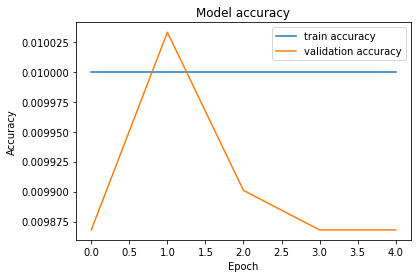

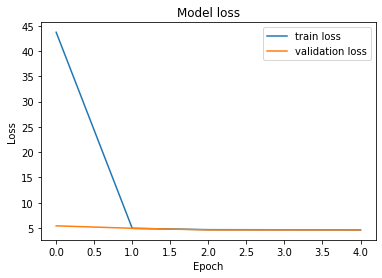

In [45]:
def plot_accuracy(history, output_dir, model_name):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/accuracy_{model_name}")
    plt.show()
    
def plot_loss(history, output_dir, model_name):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/loss_{model_name}")
    plt.show()
    
plot_accuracy(history_model_1,OUTPUT_FIGURE_DIR, 'model_exp1_base')
plot_loss(history_model_1, OUTPUT_FIGURE_DIR, 'model_exp1_base')

